# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import mplleaflet
import seaborn as sns
from re import sub
from tqdm import tqdm
from xgboost import plot_importance
from xgboost import XGBRegressor
from geopy.distance import vincenty
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from functools import reduce

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" style="width:500px;height:200px">

# Importing Boston data

In [2]:
boston_data=pd.read_csv('boston_dataset/listings.csv')
boston_calendar = pd.read_csv('boston_dataset/calendar.csv', parse_dates=['date'])
boston_reviews=pd.read_csv('boston_dataset/reviews.csv')
boston_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


# ------------------------------------------------------------------------------------

# Importing Seattle data

In [3]:
seattle_data=pd.read_csv('seattle_dataset/listings.csv')
seattle_calendar=pd.read_csv('seattle_dataset/calendar.csv', parse_dates=['date'])
seattle_reviews=pd.read_csv('seattle_dataset/reviews.csv')
seattle_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# -----------------------------------------------------------------------------------

# --------Note: Next One cell of Boston and One cell of Seattle -----------

# -----------------------------------------------------------------------------------

# Exploratory data analysis

# all columns

In [4]:
boston_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
seattle_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# data types of all columns

In [6]:
boston_data.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [7]:
seattle_data.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

# Checking Null values

In [8]:
np.sum(boston_data.isnull().any(axis=1))

3585

In [9]:
np.sum(seattle_data.isnull().any(axis=1))

3818

# Data information

In [10]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [11]:
seattle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Total Lenght of the data

In [12]:
len(boston_data)

3585

In [13]:
len(seattle_data)

3818

# Shape of Data

In [14]:
boston_data.shape

(3585, 95)

In [15]:
seattle_data.shape

(3818, 92)

# Description of data

In [16]:
boston_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [17]:
seattle_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# ----------------------------------------------------------------------------

# ----------------------------------------------------------------------------

# Data cleaning

# Coloumns that are upto 40% missing

In [18]:
missing_val = set(boston_data.columns[boston_data.isnull().mean() > 0.40])
missing_val

{'access',
 'has_availability',
 'interaction',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

In [19]:
missing_val = set(seattle_data.columns[seattle_data.isnull().mean() > 0.40])
missing_val

{'license',
 'monthly_price',
 'notes',
 'security_deposit',
 'square_feet',
 'weekly_price'}

# Drop columns having more than 40% of missing values

In [20]:
def drop_null_values(df, missing_thres=0.4):
    new_df = df.copy()
    missing_thres = len(new_df) - (len(new_df) * missing_thres)
    new_df = new_df.dropna(thresh=missing_thres, axis=1)

    return new_df
missing_thres = 0.4
boston_clean_data = drop_null_values(boston_data, missing_thres)

In [21]:
def drop_null_values(df, missing_thres=0.4):
    new_df = df.copy()
    missing_thres = len(new_df) - (len(new_df) * missing_thres)
    new_df = new_df.dropna(thresh=missing_thres, axis=1)

    return new_df
missing_thres = 0.4
seattle_clean_data = drop_null_values(seattle_data, missing_thres)

# Cleaning Price by removing dollar sign

In [22]:
boston_clean_data['price'] = boston_clean_data['price'].str.replace("[$, ]", "").astype("float")

In [23]:
seattle_clean_data['price'] = seattle_clean_data['price'].str.replace("[$, ]", "").astype("float")

# Count of Null values

In [24]:
np.sum(boston_clean_data.isnull().any(axis=1))

2993

In [25]:
np.sum(seattle_clean_data.isnull().any(axis=1))

2721

# Filling Null calues 

In [26]:
boston_clean_data.fillna(method ='ffill', inplace = True)

In [27]:
seattle_clean_data.fillna(method ='ffill', inplace = True)

# Count of Null values

In [28]:
boston_clean_data=boston_clean_data.replace(np.NaN, 0)
np.sum(boston_clean_data.isnull().any(axis=1))

0

In [29]:
seattle_clean_data=seattle_clean_data.replace(np.NaN, 0)
np.sum(seattle_clean_data.isnull().any(axis=1))

0

# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------

# Data Visualization

# wordCloud of summary 

# wordCloud of description 

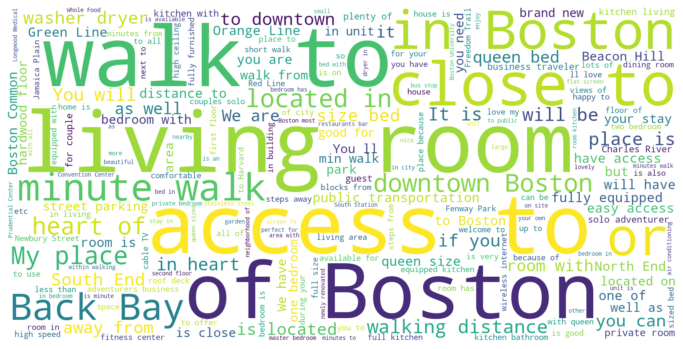

In [78]:
neg = boston_clean_data['description']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,background_color='white',stopwords=('apartment','the','and','there','this')).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

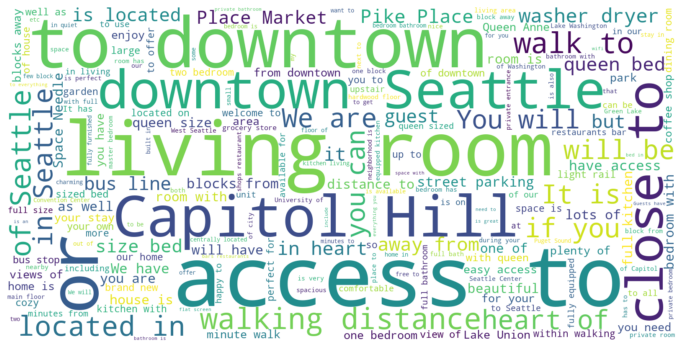

In [88]:
neg = seattle_clean_data['description']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,background_color='white',stopwords=('apartment','the','and','there','this')).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# wordCloud of comments 

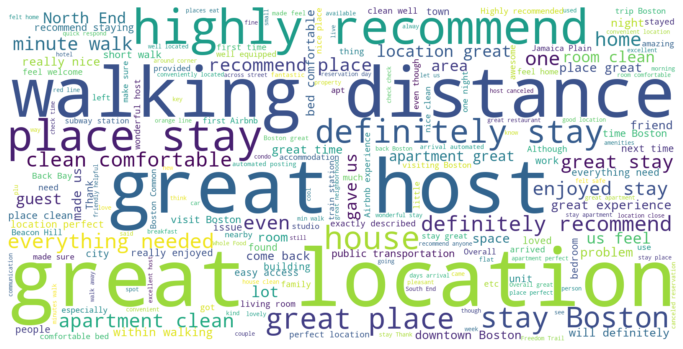

In [87]:
neg = boston_reviews['comments']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

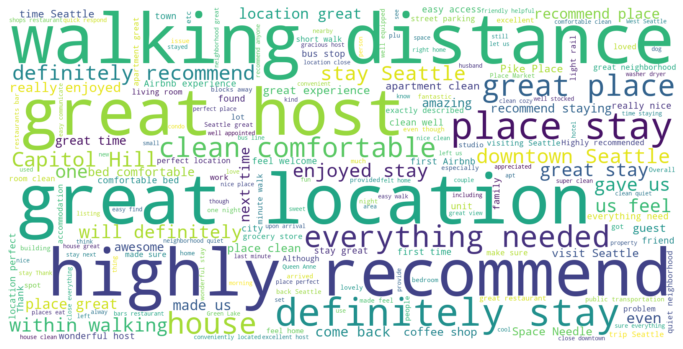

In [89]:
neg = seattle_reviews['comments']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Reviews Distributions

Text(0, 0.5, 'Count')

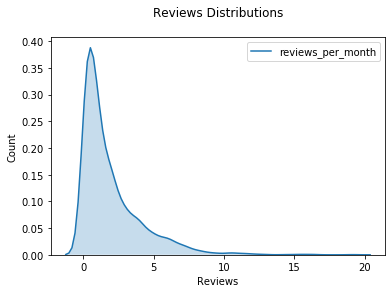

In [33]:
sns.kdeplot(boston_clean_data['reviews_per_month'], shade = True)
plt.title('Reviews Distributions\n')
plt.xlabel('Reviews')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

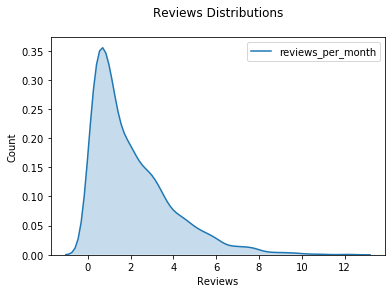

In [34]:
sns.kdeplot(seattle_clean_data['reviews_per_month'], shade = True)
plt.title('Reviews Distributions\n')
plt.xlabel('Reviews')
plt.ylabel('Count')

# Frequency Distribution of calculated_host_listings_count

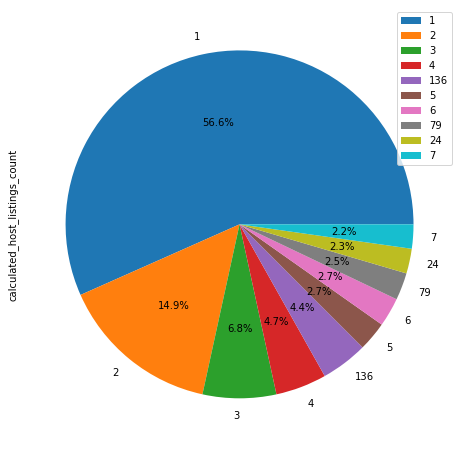

In [35]:
boston_clean_data["calculated_host_listings_count"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

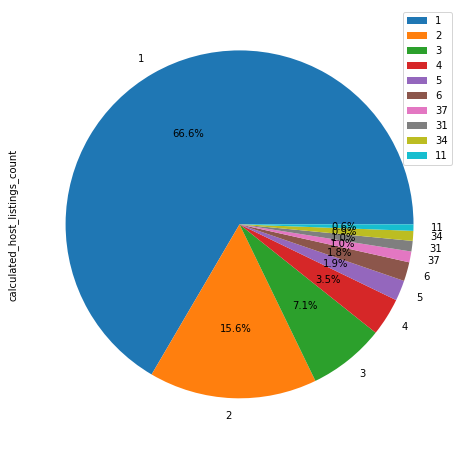

In [36]:
seattle_clean_data["calculated_host_listings_count"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of instant_bookable

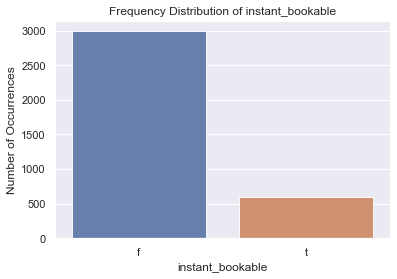

In [37]:
carrier_count = boston_clean_data["instant_bookable"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of instant_bookable')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('instant_bookable', fontsize=12)
plt.show()

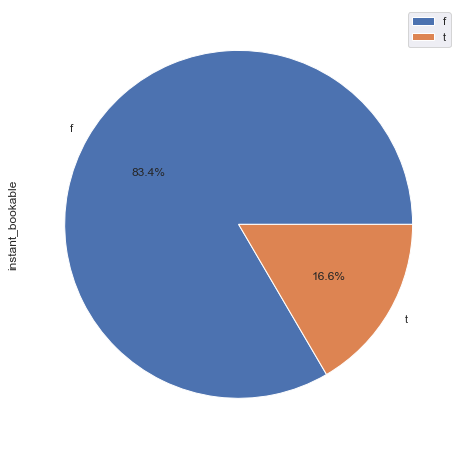

In [38]:
boston_clean_data["instant_bookable"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

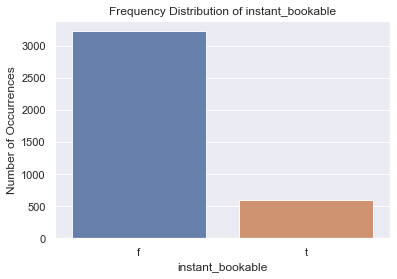

In [39]:
carrier_count = seattle_clean_data["instant_bookable"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of instant_bookable')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('instant_bookable', fontsize=12)
plt.show()

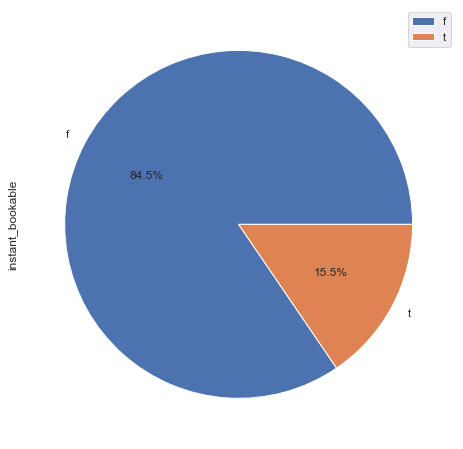

In [40]:
seattle_clean_data["instant_bookable"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of require_guest_phone_verification

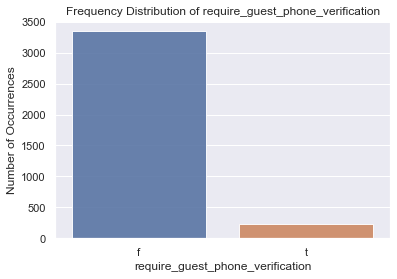

In [41]:
carrier_count = boston_clean_data["require_guest_phone_verification"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of require_guest_phone_verification')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('require_guest_phone_verification', fontsize=12)
plt.show()

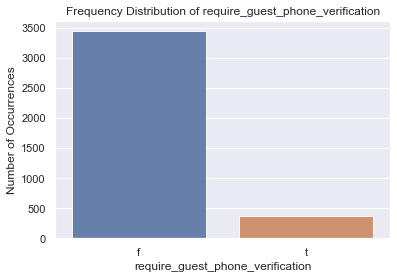

In [42]:
carrier_count = seattle_clean_data["require_guest_phone_verification"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of require_guest_phone_verification')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('require_guest_phone_verification', fontsize=12)
plt.show()

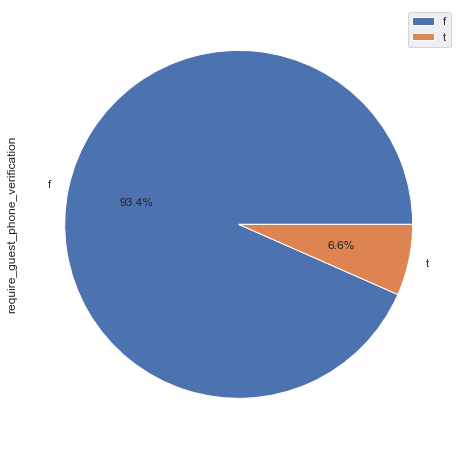

In [43]:
boston_clean_data["require_guest_phone_verification"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

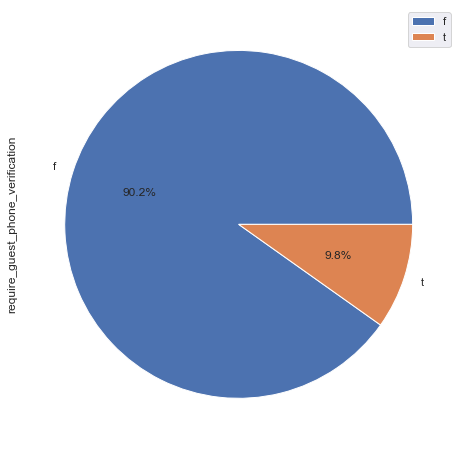

In [44]:
seattle_clean_data["require_guest_phone_verification"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Frequency Distribution of require_guest_profile_picture

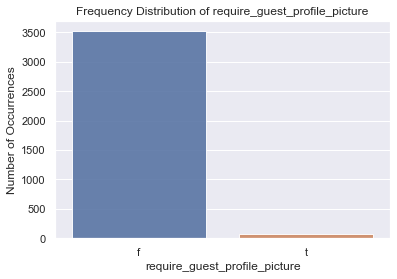

In [45]:
carrier_count = boston_clean_data["require_guest_profile_picture"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of require_guest_profile_picture')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('require_guest_profile_picture', fontsize=12)
plt.show()

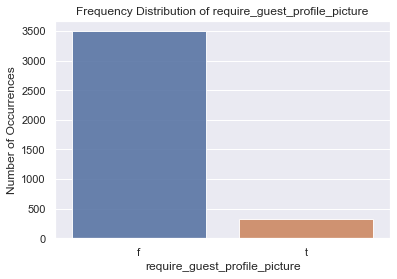

In [46]:
carrier_count = seattle_clean_data["require_guest_profile_picture"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of require_guest_profile_picture')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('require_guest_profile_picture', fontsize=12)
plt.show()

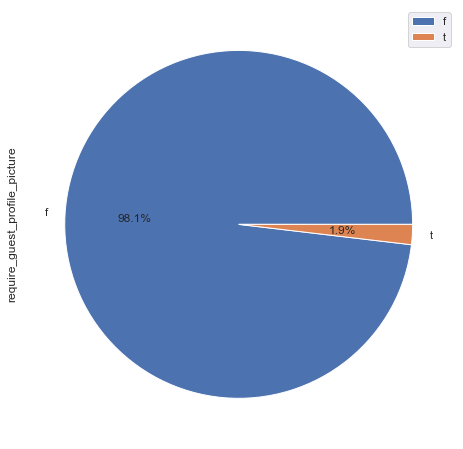

In [47]:
boston_clean_data["require_guest_profile_picture"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

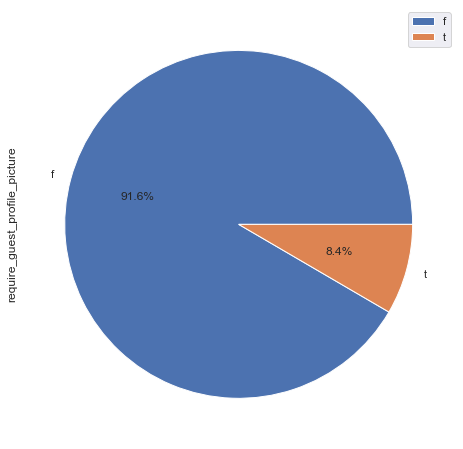

In [48]:
seattle_clean_data["require_guest_profile_picture"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

# Numeric features distrubution 

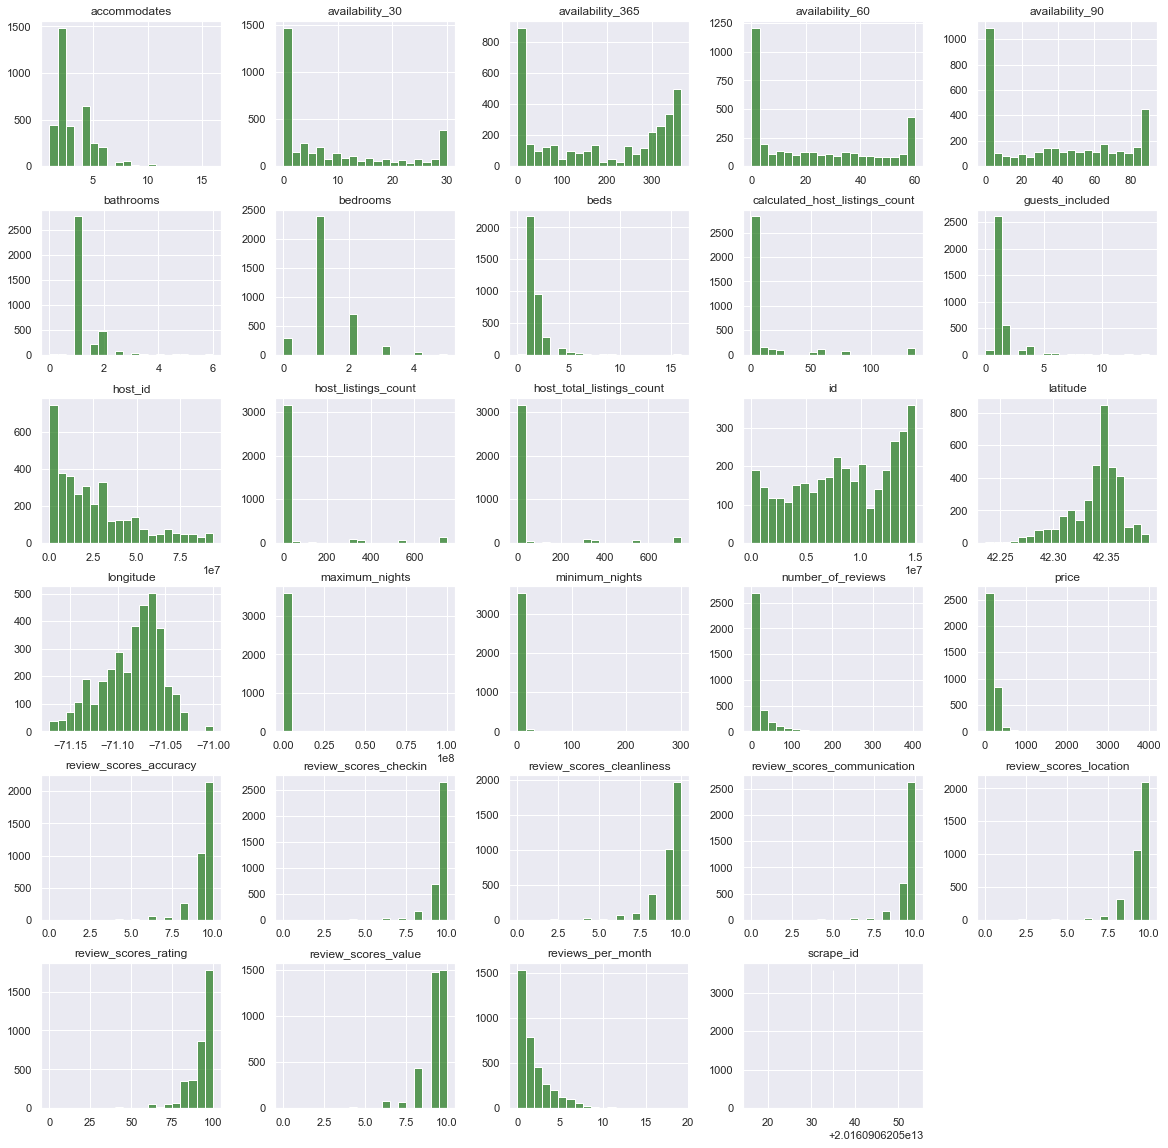

In [49]:
boston_clean_data.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

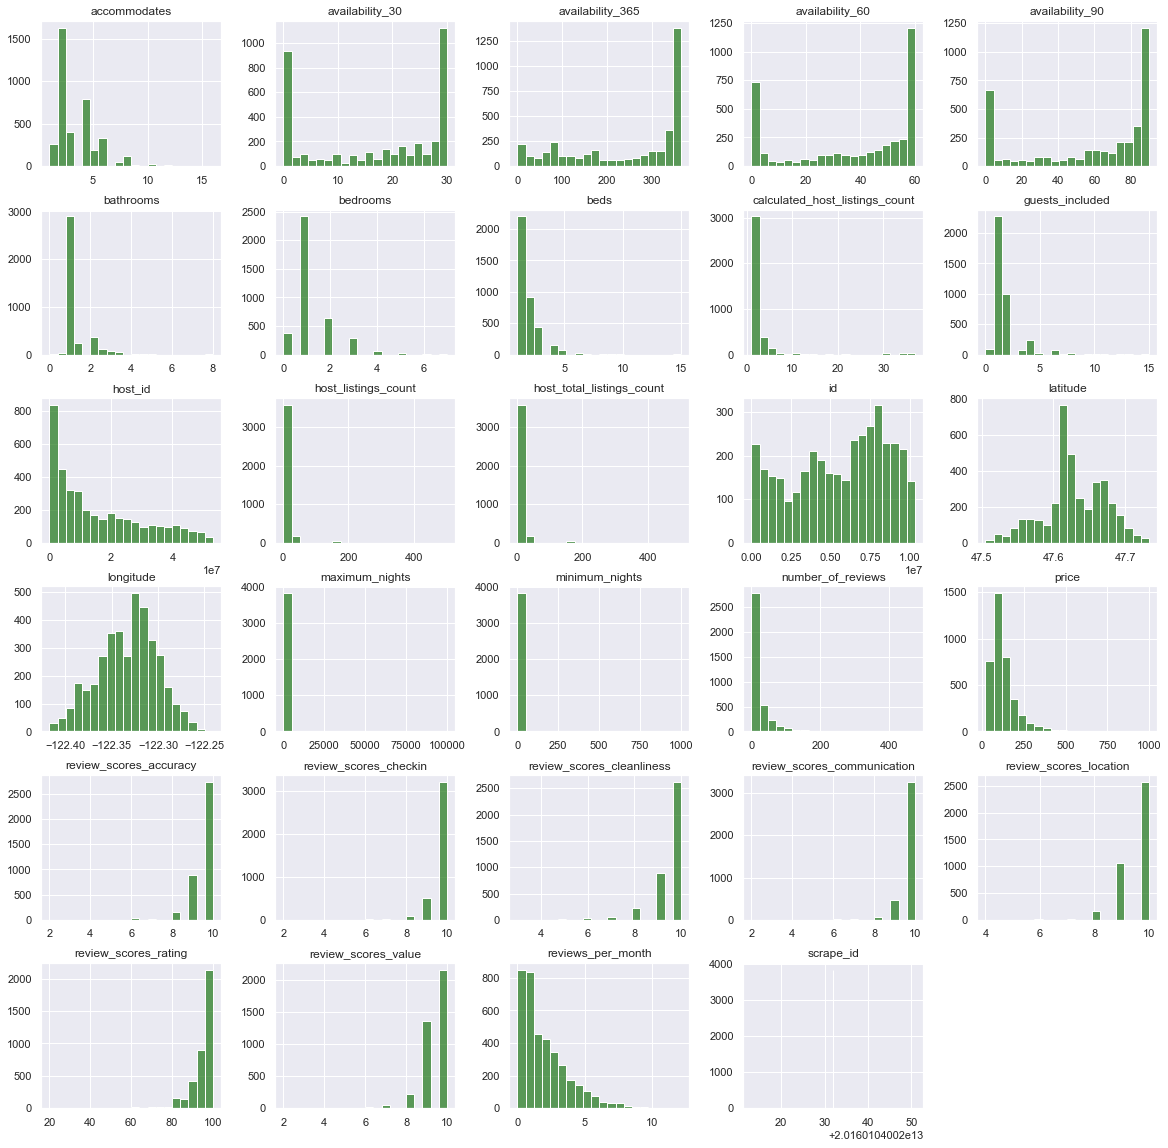

In [50]:
seattle_clean_data.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

# -------------------------------------------------------------------------------

# -------------------------------------------------------------------------------

# Price Relationships

# Bed and Property type relationship on price

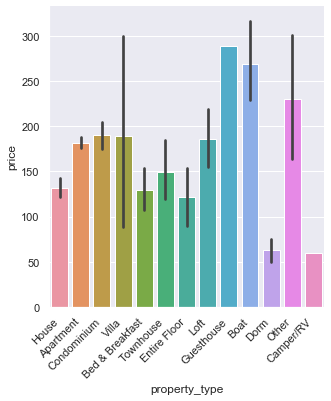

In [51]:
c=sns.catplot(x='property_type', y='price', kind='bar', data=boston_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

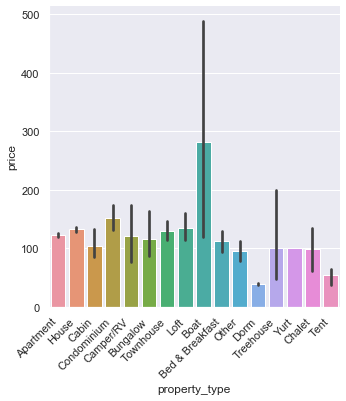

In [52]:
c=sns.catplot(x='property_type', y='price', kind='bar', data=seattle_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

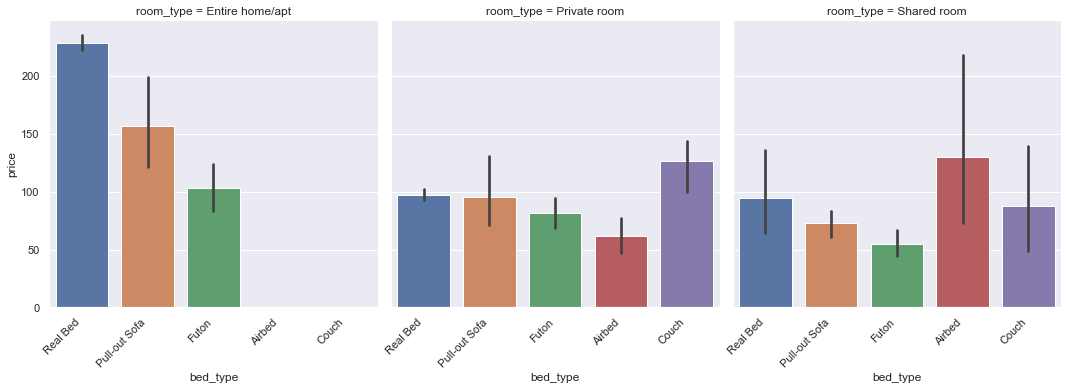

In [53]:
c=sns.catplot(x='bed_type', y='price', col = 'room_type', kind='bar', data=boston_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

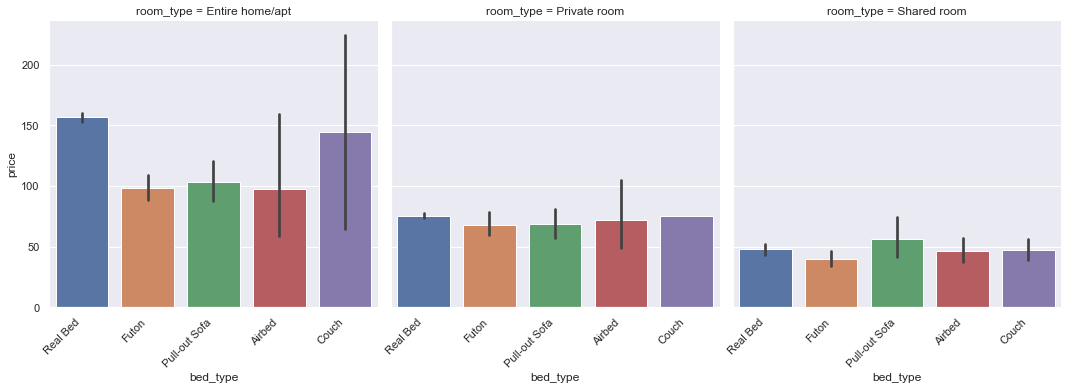

In [54]:
c=sns.catplot(x='bed_type', y='price', col = 'room_type', kind='bar', data=seattle_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

#  Number of beds, bathrooms, bedrooms and accommodates relationship on price

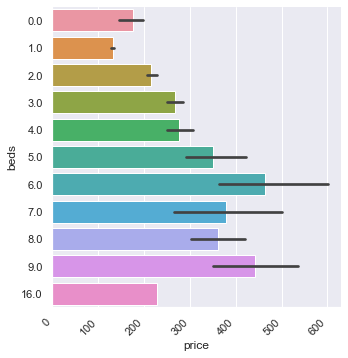

In [55]:
c=sns.catplot(x='price', y='beds', orient ='h', kind='bar',data=boston_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

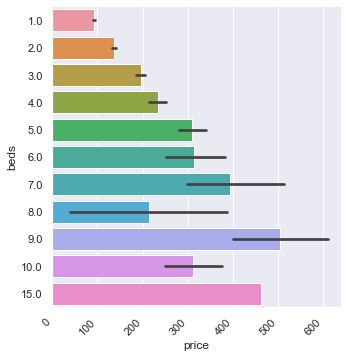

In [56]:
c=sns.catplot(x='price', y='beds', orient ='h', kind='bar',data=seattle_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

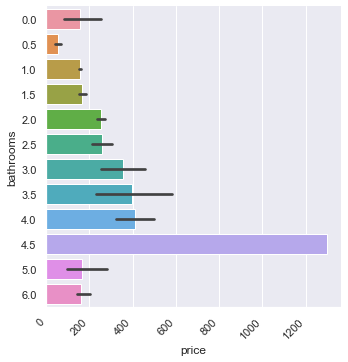

In [57]:
c=sns.catplot(x='price', y='bathrooms', kind='bar', orient = 'h', data=boston_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

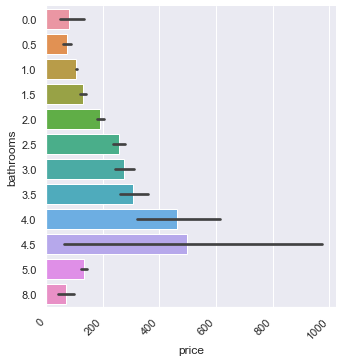

In [58]:
c=sns.catplot(x='price', y='bathrooms', kind='bar', orient = 'h', data=seattle_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

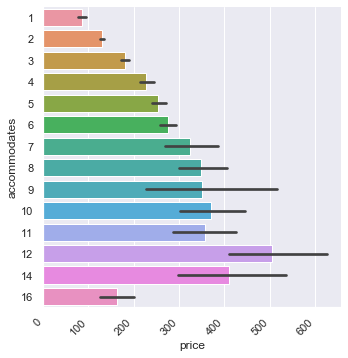

In [59]:
c=sns.catplot(x='price', y='accommodates', orient = 'h', kind='bar',data=boston_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

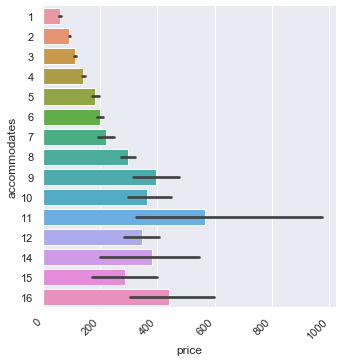

In [60]:
c=sns.catplot(x='price', y='accommodates', orient = 'h', kind='bar',data=seattle_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

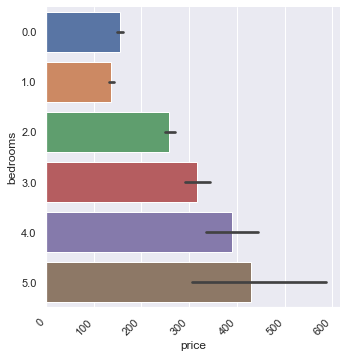

In [61]:
c=sns.catplot(x='price', y='bedrooms', orient = 'h', kind='bar',data=boston_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

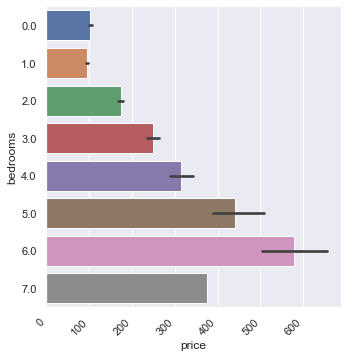

In [62]:
c=sns.catplot(x='price', y='bedrooms', orient = 'h', kind='bar',data=seattle_clean_data)
c.set_xticklabels(rotation=45, horizontalalignment='right')

# pricing property

In [96]:
#Clean up the data
#Function converts price in a string in currency format to float
def clean_price(price):
    """Take in a string and return a float without the currency sign"""
    try:
        return float(sub(r'[^\d.]', '', price))
    except:
        return float(price)

seattle_calendar['price'] = seattle_calendar['price'].map(clean_price)
boston_calendar['price'] = boston_calendar['price'].map(clean_price)
seattle_calendar['day_of_year'] = seattle_calendar['date'].map(lambda x: x.timetuple().tm_yday)
boston_calendar['day_of_year'] = boston_calendar['date'].map(lambda x: x.timetuple().tm_yday)
seattle_calendar['available'] = seattle_calendar['available'].apply(lambda x: True if x == 't' else False)
boston_calendar['available'] = boston_calendar['available'].apply(lambda x: True if x == 't' else False)
avg_price_day_s = seattle_calendar.drop('listing_id',axis=1).groupby('day_of_year').mean()
avg_price_day_b = boston_calendar.drop('listing_id',axis=1).groupby('day_of_year').mean()
avg_price_date_s = seattle_calendar.drop(['listing_id','day_of_year'],axis=1).groupby('date').mean()
avg_price_date_b = boston_calendar.drop(['listing_id','day_of_year'],axis=1).groupby('date').mean()

In [97]:
print('The median house price in Boston is ${}'.format(int(boston_calendar['price'].median())))
print('The median house price in Seattle is ${}'.format(int(seattle_calendar['price'].median())))

The median house price in Boston is $150
The median house price in Seattle is $109


In [140]:
all_listings = pd.concat([seattle_clean_data, boston_clean_data])

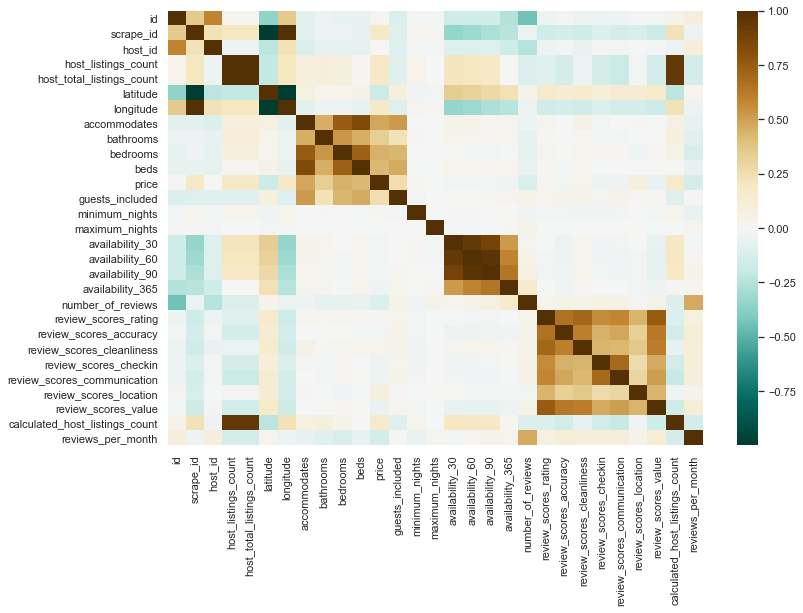

In [141]:
plt.figure(figsize=(12,8))
sns.heatmap(all_listings.corr(),cmap="BrBG_r");
plt.show()

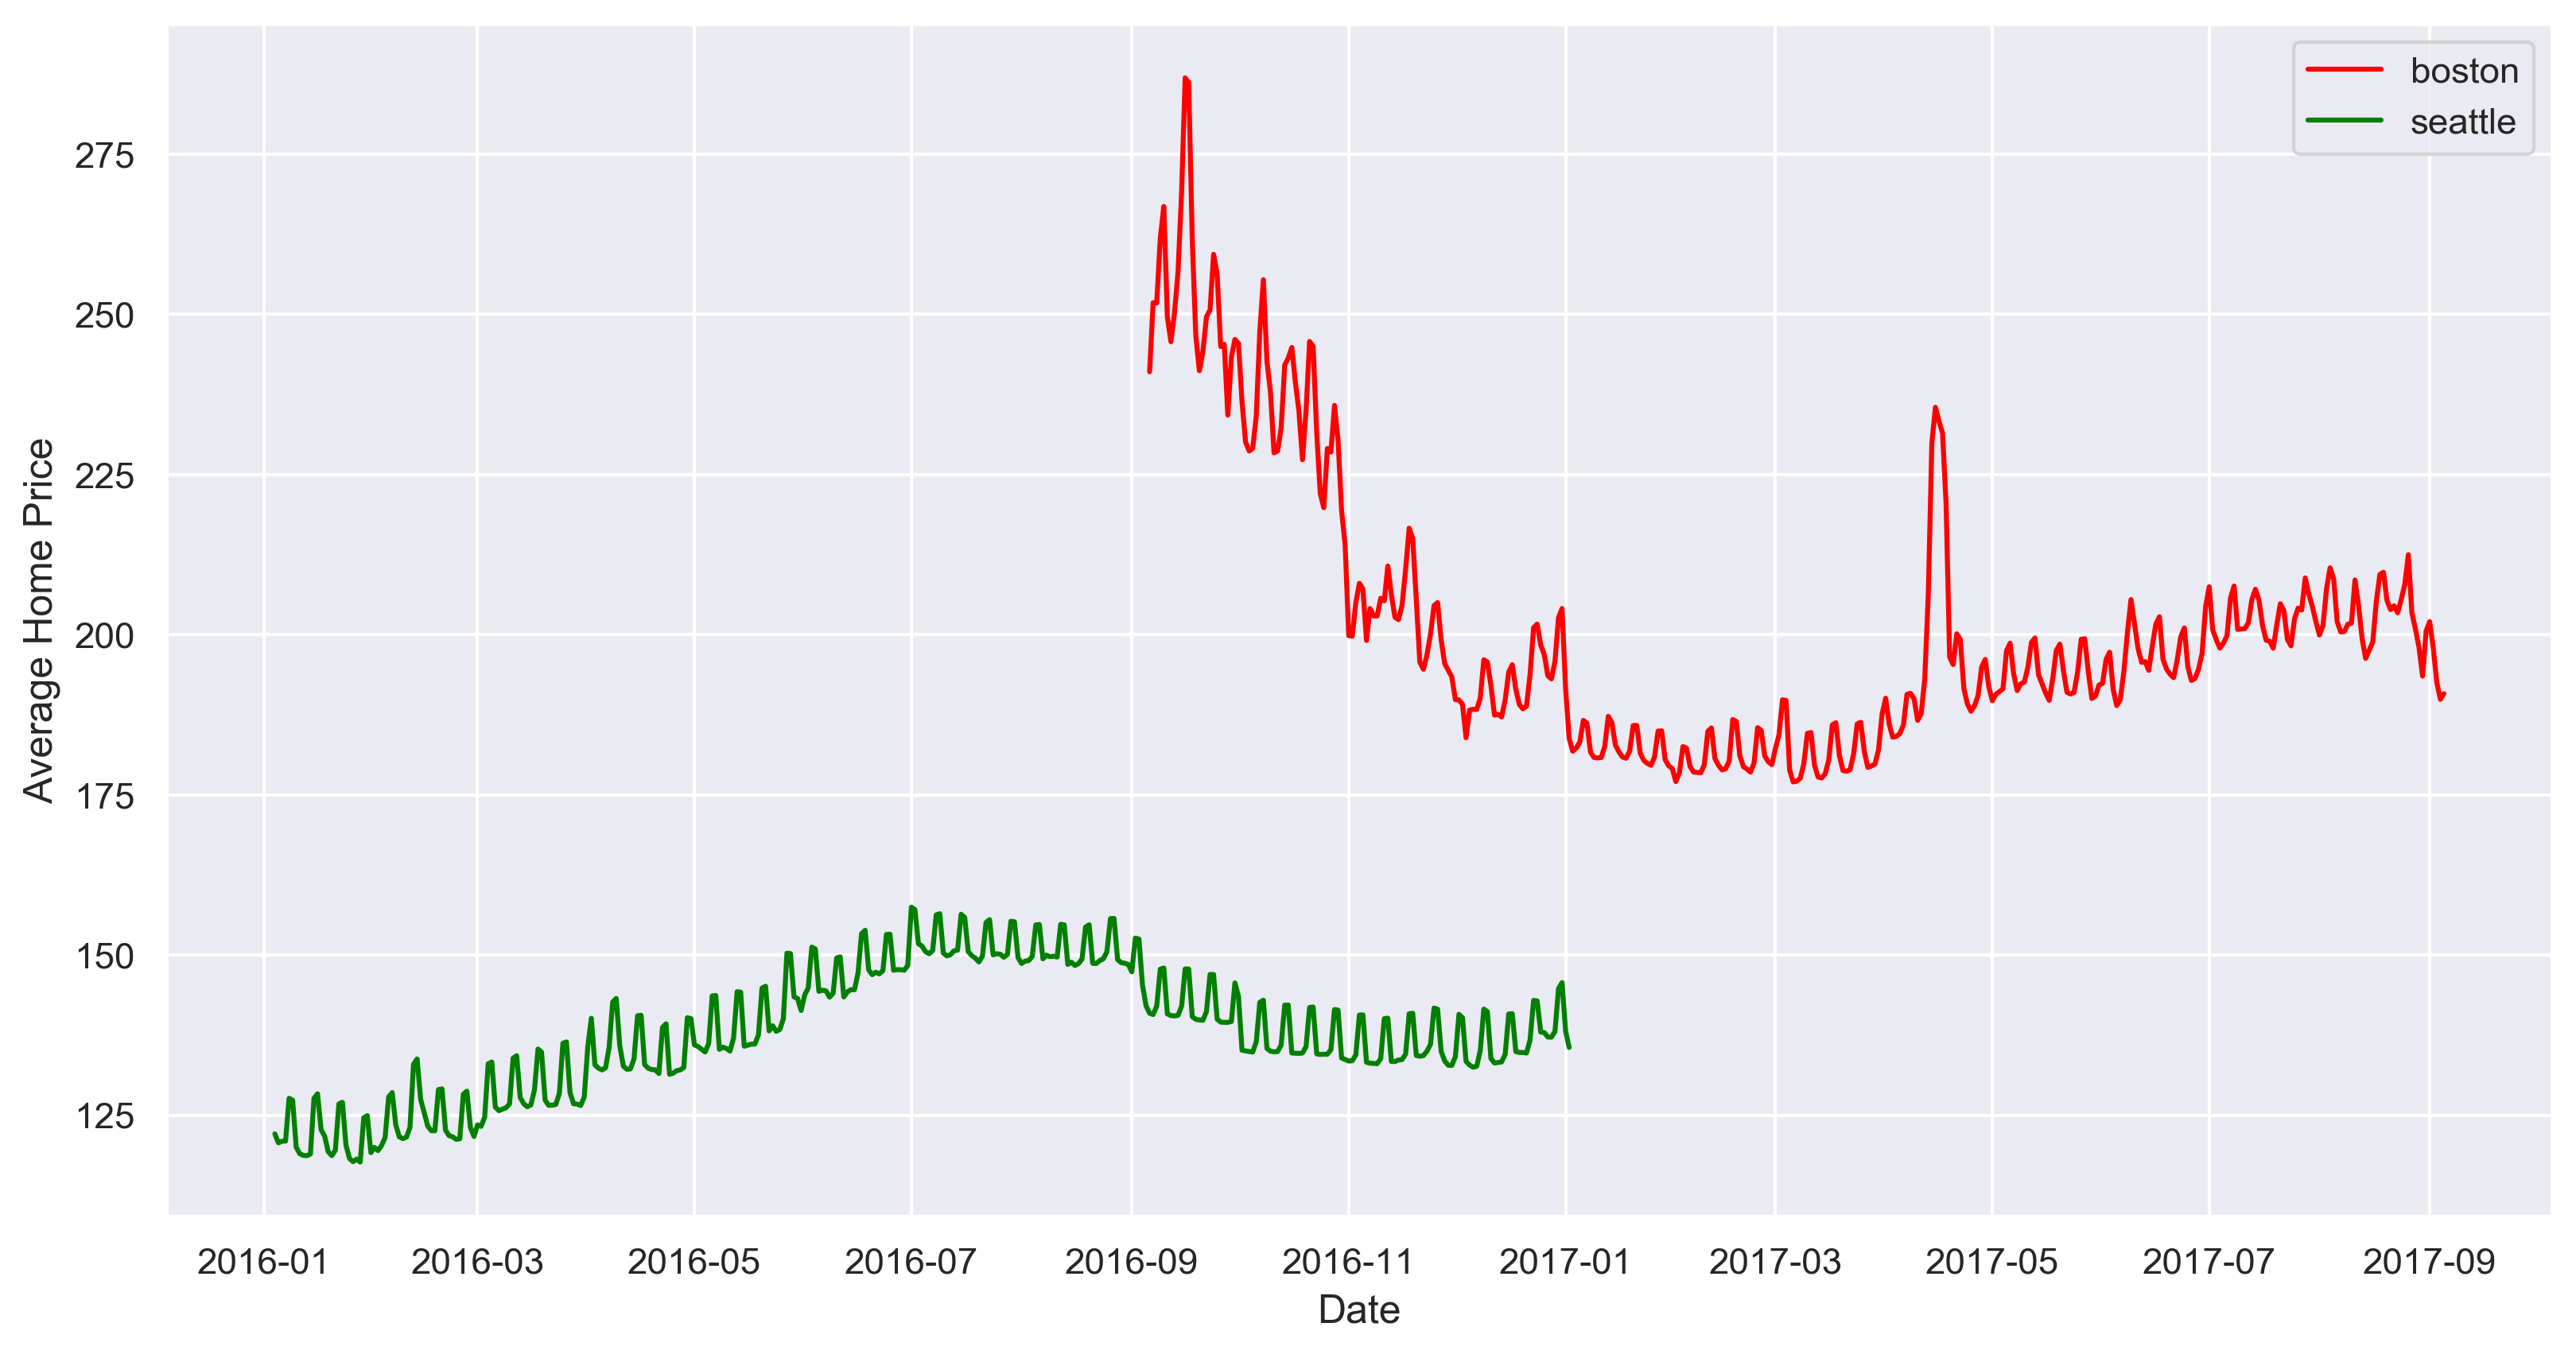

In [99]:
fig = plt.figure(figsize=(10,5),dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.plot(avg_price_date_b['price'], label='boston', color='red')
ax.plot(avg_price_date_s['price'], label='seattle', color='green')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Price');
fig.savefig('png\PriceVsDate.png', bbox_inches='tight')

In [142]:
'The average price during the Boston Marathon period in 2017 was ${}'.format(int(avg_price_date_b.loc['2017-04-14':'2017-04-17','price'].mean()))

'The average price during the Boston Marathon period in 2017 was $232'

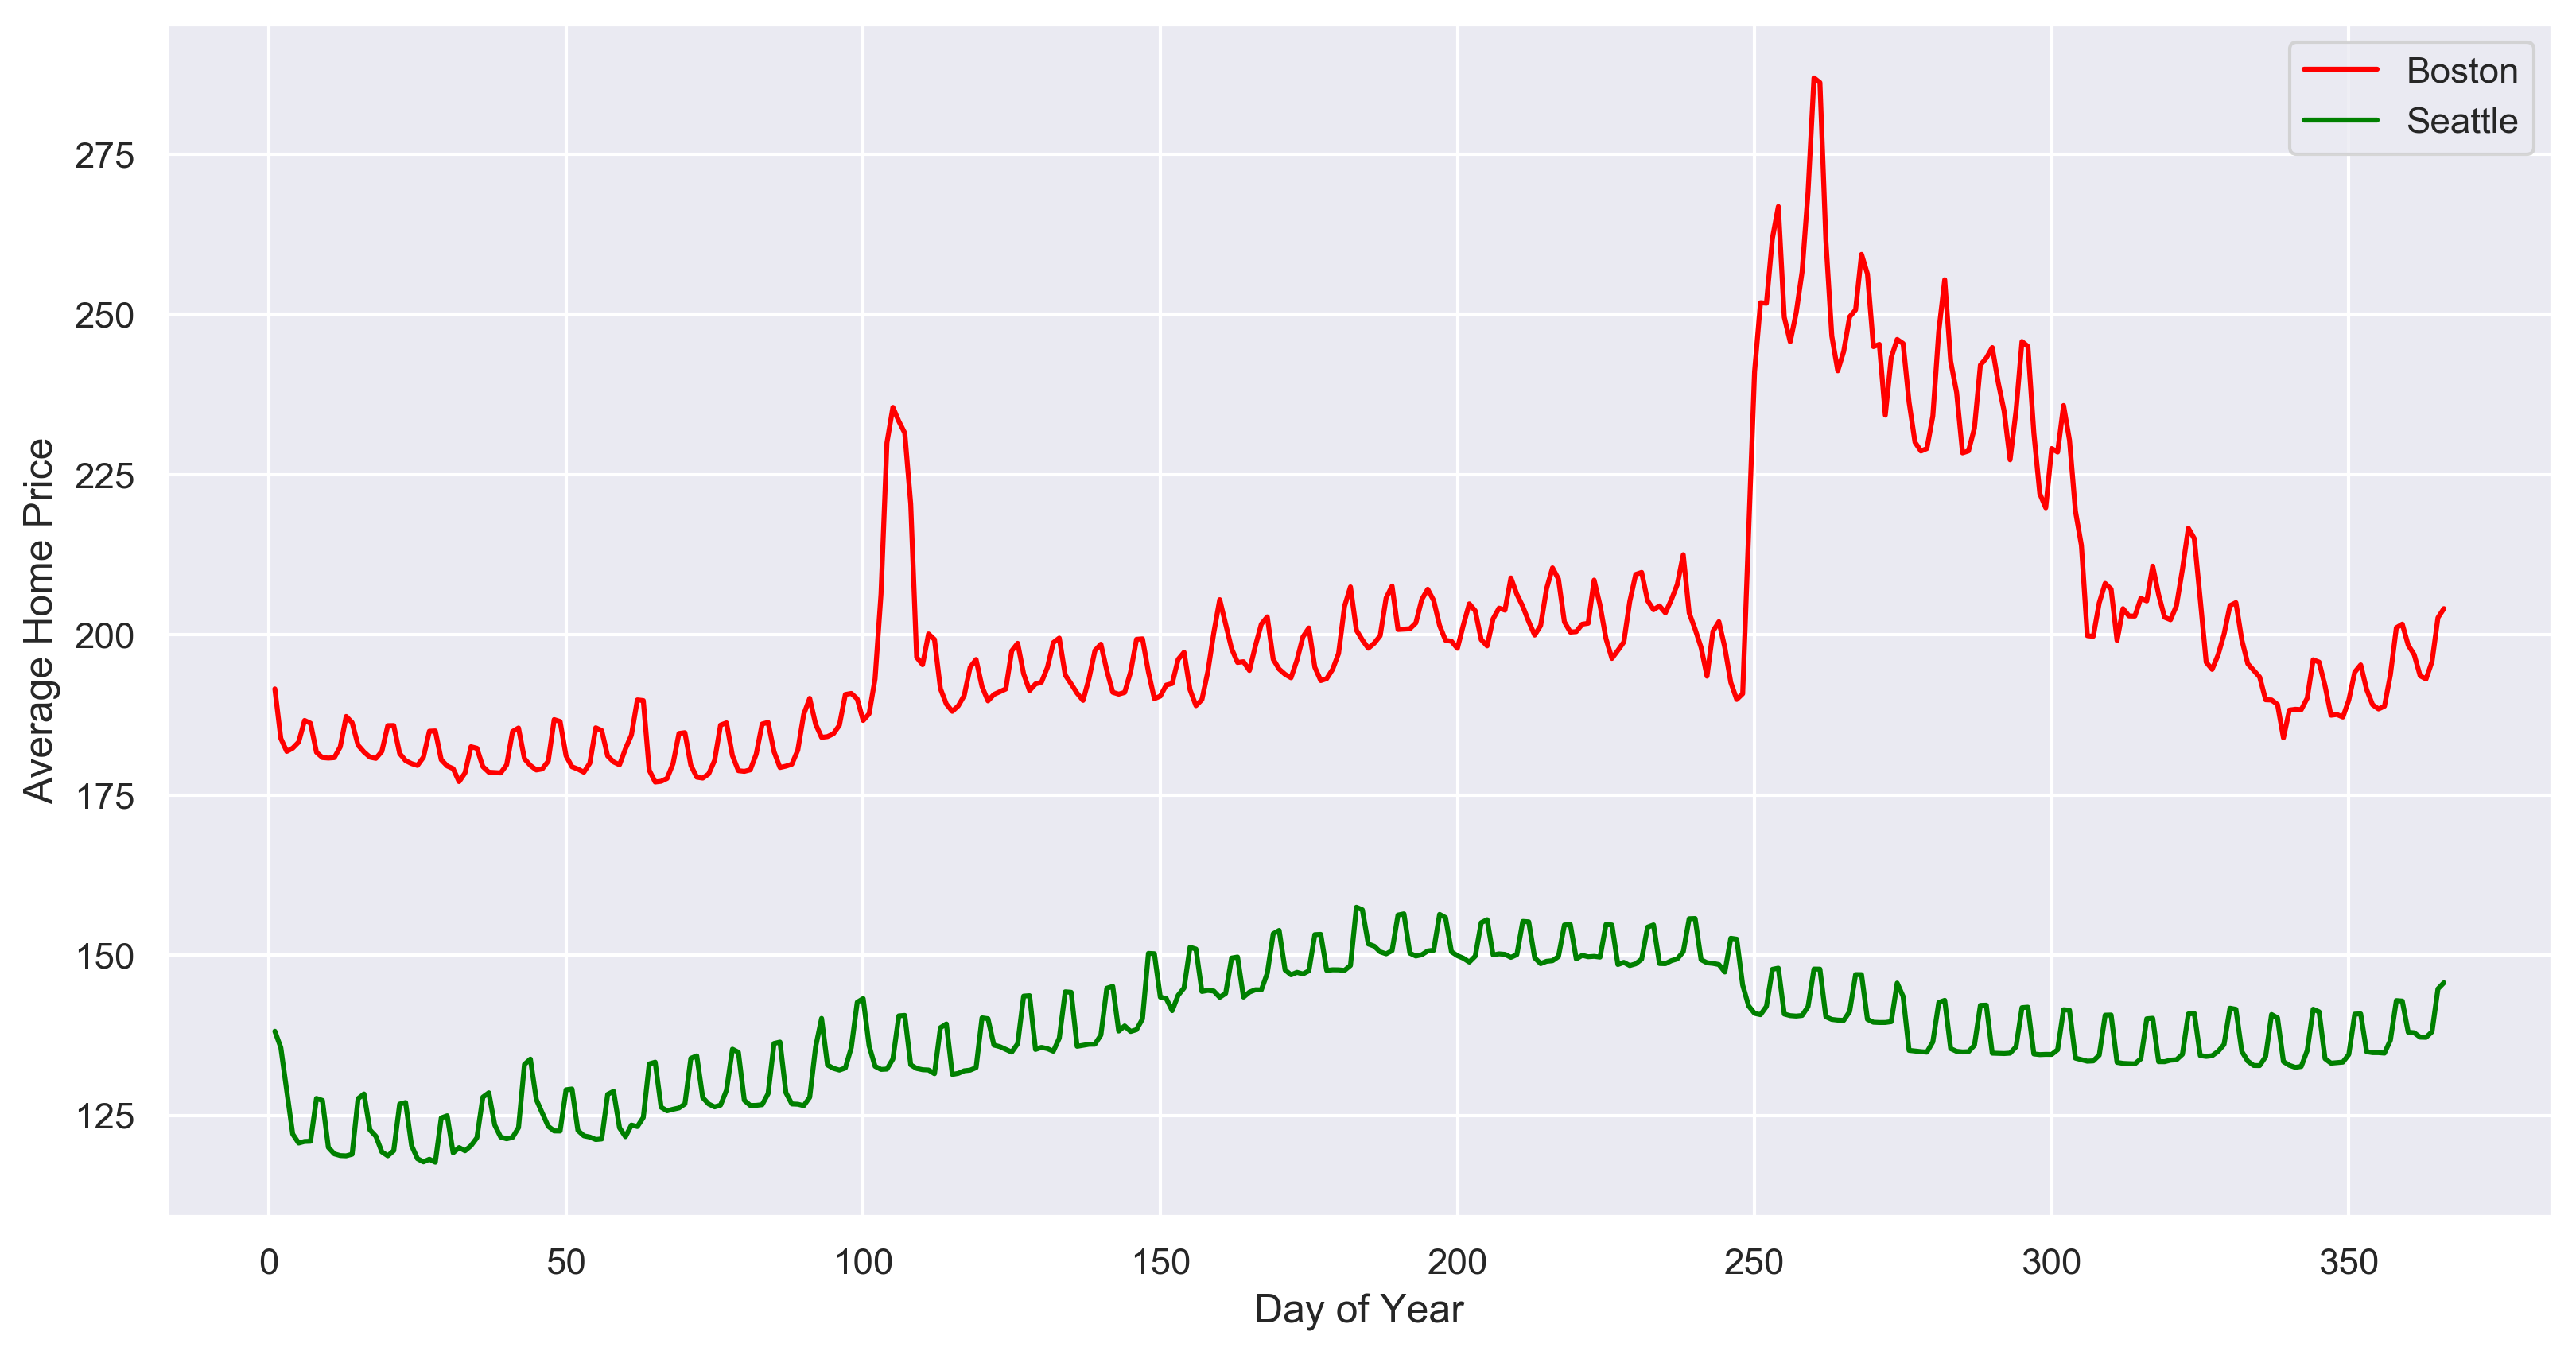

In [144]:
fig2 = plt.figure(figsize=(10,5),dpi=300)
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(avg_price_day_b['price'], label='Boston',color='red')
ax2.plot(avg_price_day_s['price'], label='Seattle',color='green');
ax2.legend()
ax2.set_xlabel('Day of Year')
ax2.set_ylabel('Average Home Price')
fig2.savefig('png\PricevsDay.png', bbox_inches='tight')

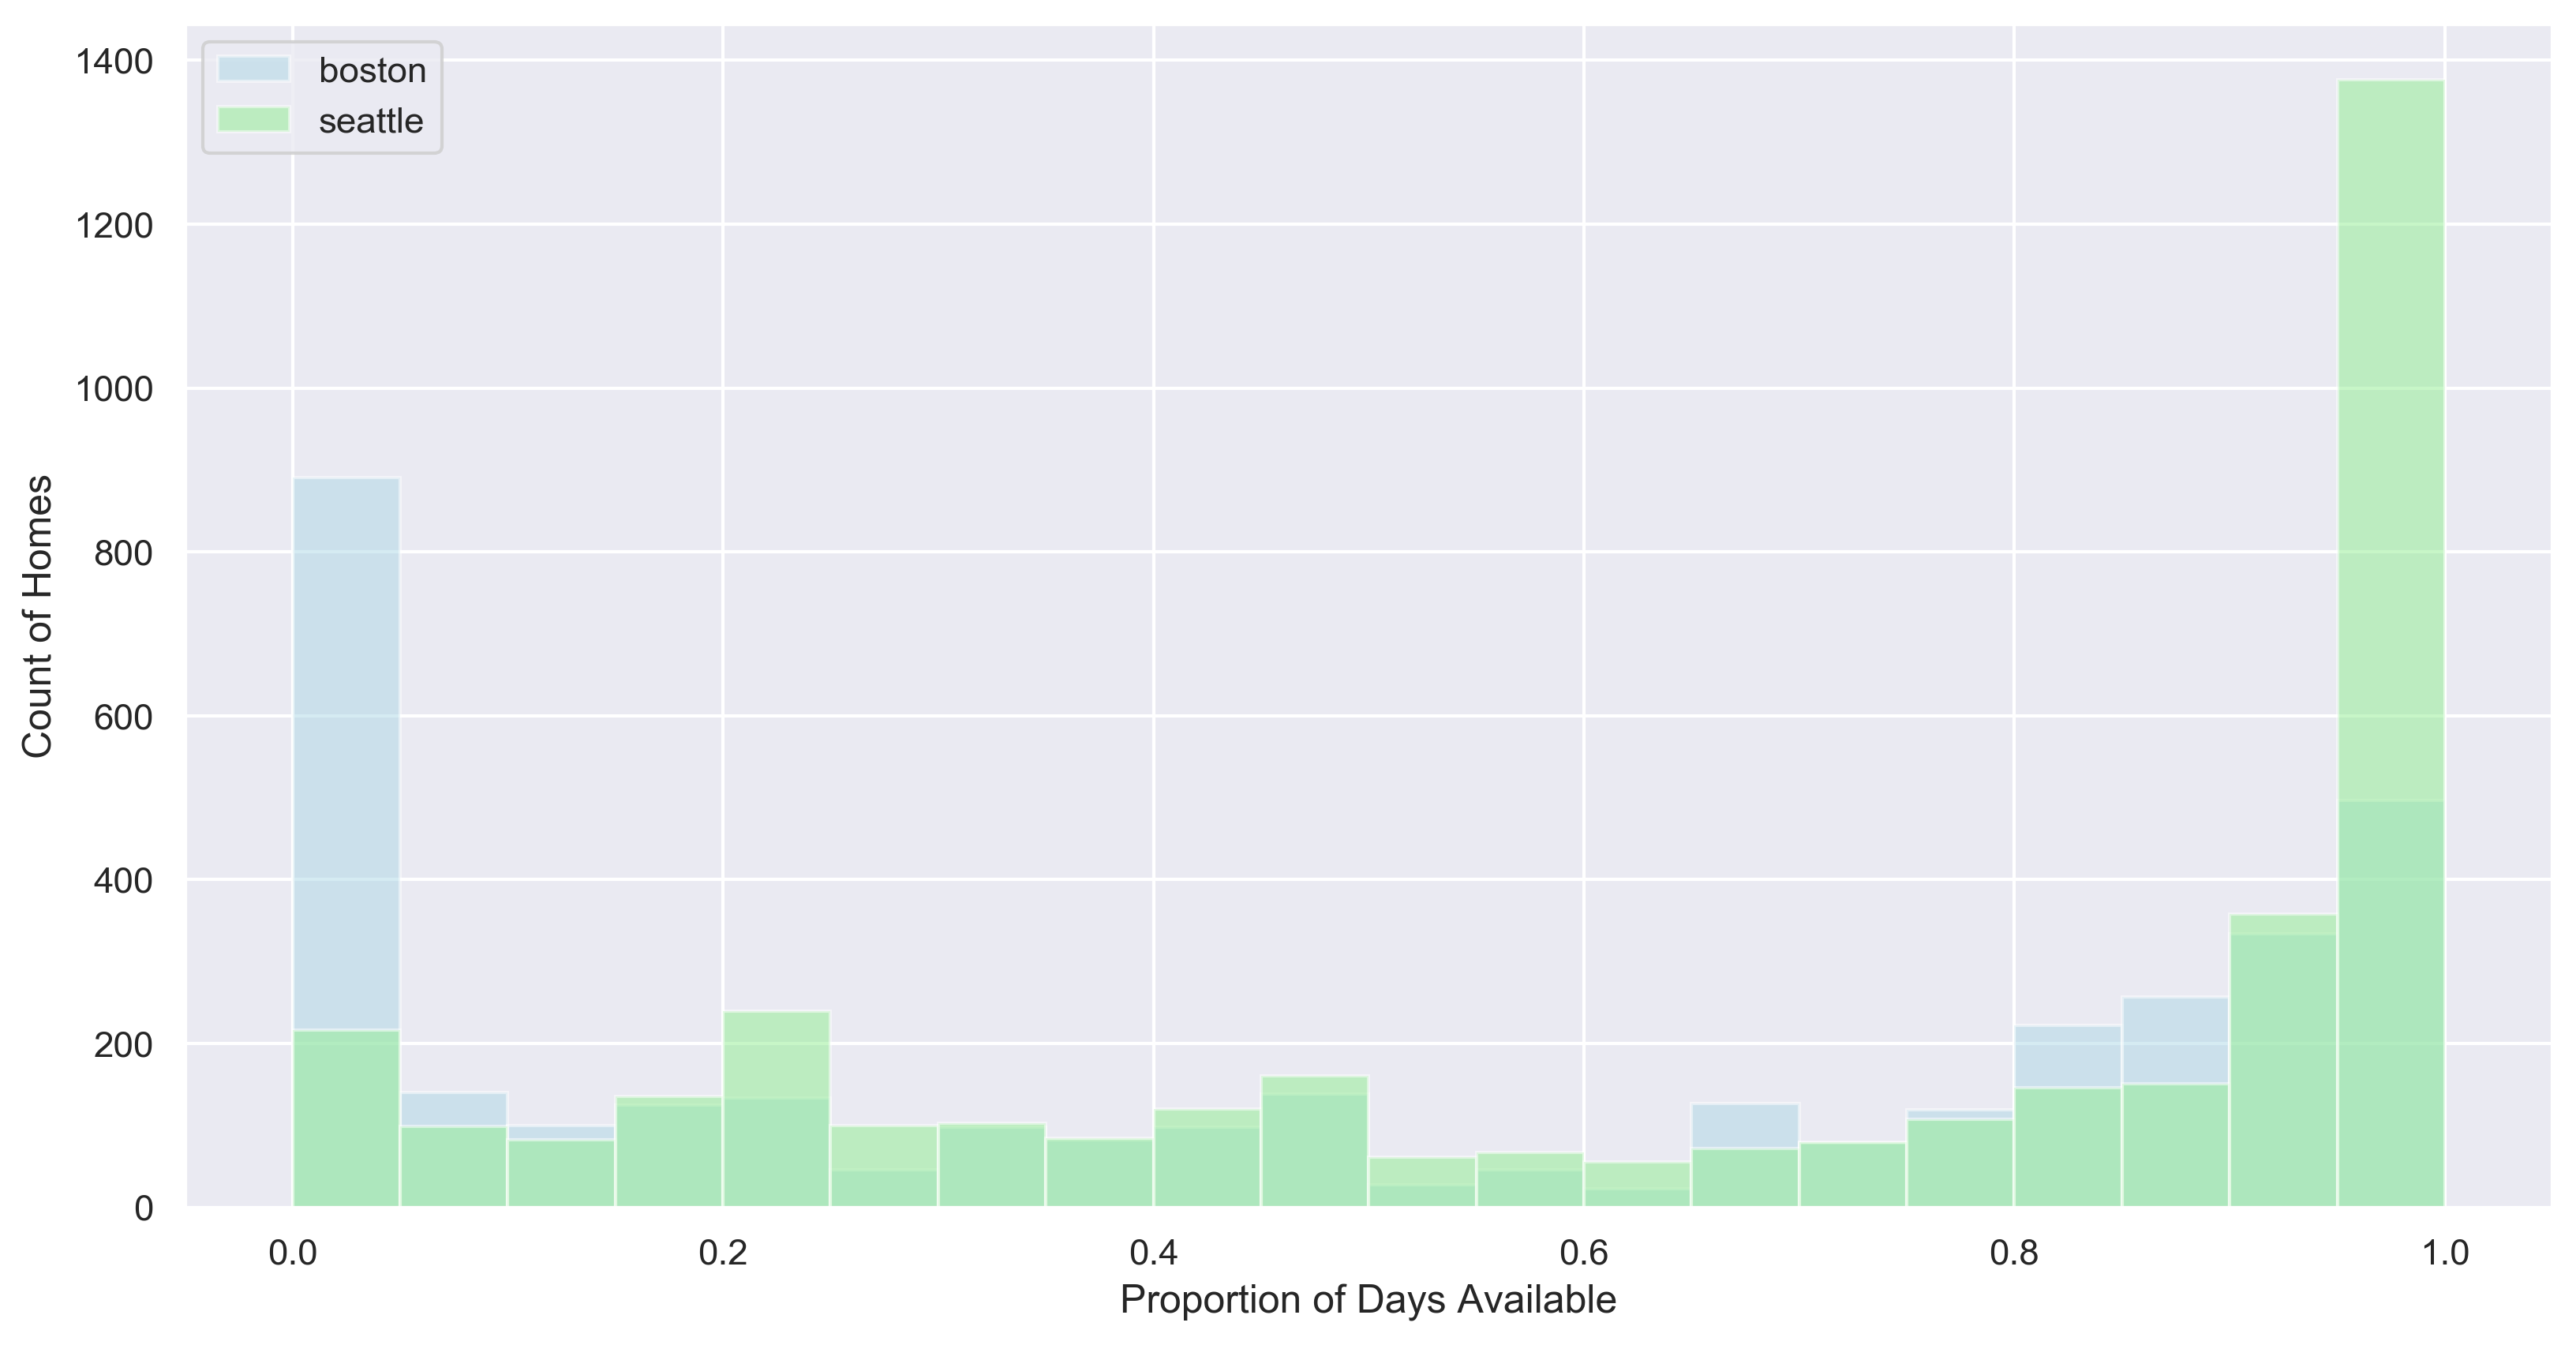

In [150]:
fig3 = plt.figure(figsize=(10,5),dpi=300)
ax3 = fig3.add_axes([0,0,1,1])
ax3.hist(boston_calendar.groupby('listing_id').mean()['available'],bins=20,alpha=0.5, label='boston',color='lightblue');
ax3.hist(seattle_calendar.groupby('listing_id').mean()['available'],bins=20,alpha=0.5, label='seattle', color='lightgreen')
ax3.legend()
ax3.set_xlabel('Proportion of Days Available')
ax3.set_ylabel('Count of Homes')
fig3.savefig('png\PropDaysAvailable.png', bbox_inches='tight')

In [151]:
'In Boston, at any given time, there is a %{} chance that a house is available, while in Seattle this figure is much higher at %{}'.format(int(boston_calendar['available'].mean()*100), int(seattle_calendar['available'].mean()*100))

'In Boston, at any given time, there is a %49 chance that a house is available, while in Seattle this figure is much higher at %67'

# Visualize airbnb location in Boston and Seattle area

In [4]:
# Dataset from both Boston and Seattle contains geographical information. 
# Let's draw their geospatial distribution in map to take a look.
boston_samples = boston_data.sample(100)
plt.scatter(boston_samples['longitude'], boston_samples['latitude'])
mplleaflet.display()

/Users/zhangjinhao/miniconda3/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
seattle_samples = seattle_data.sample(100)
plt.scatter(seattle_samples['longitude'], seattle_samples['latitude'])
mplleaflet.display()

# difference in price?

In [32]:
boston_prices = boston_calendar.dropna(how = 'any', axis = 0)
seattle_prices = seattle_calendar.dropna(how = 'any', axis = 0)

In [33]:
seattle_prices.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [37]:
boston_prices['price'] = boston_prices['price'].apply(lambda x : float(x.replace('$', '').replace(',', '')))
seattle_prices['price'] = seattle_prices['price'].apply(lambda x : float(x.replace('$', '').replace(',', '')))

/Users/zhangjinhao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zhangjinhao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
boston_prices['price'].describe()

count      643037
unique       1246
top       $150.00
freq        20752
Name: price, dtype: object

In [35]:
seattle_prices['price'].describe()

count      934542
unique        669
top       $150.00
freq        36646
Name: price, dtype: object

# Two distribution t-test with different variance assumption
$$H_0 : \bar{X_1}\ =\ \bar{X_2}  \\ H_1 : \bar{X_1}\ !=\ \bar{X_2}$$
$$t = \frac{\bar{X_1} - \bar{X_2}}{s}\enspace$$
satisfies t-distribution where$$\enspace s = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

Degree of freedom is equal to$$
DF = \frac{(VAR_1 + VAR_2)^2}{\frac{VAR_1^2}{n_1 - 1} + \frac{VAR_2^2}{n_2 - 1}} 
$$

# After testing, we find that the p-value is smaller than 0.001, which means that we should reject $H_0$ with a high confidence. And the average renting price between Boston and Seattle is very different.

In [40]:
s_2 = np.sqrt(seattle_prices['price'].std()**2 / seattle_prices['price'].shape[0] + \
              boston_prices['price'].std()**2 / boston_prices['price'].shape[0])

t = (seattle_prices['price'].mean() - boston_prices['price'].mean()) / s_2
t

-242.40846787349514

In [41]:
seattle_prices['price'].var()

11038.206658082257

In [42]:
DF = (seattle_prices['price'].var() + boston_prices['price'].var())**2 / \
     (seattle_prices['price'].var()**2 / (seattle_prices['price'].shape[0] - 1) + \
      boston_prices['price'].var()**2 / (boston_prices['price'].shape[0] - 1))
DF

1069725.0833145746

In [43]:
# According to the t-test table, we find that the mean value for prices in Boston and Seattle is different. With p-value < 0.001

# Price value histogram for Boston and Seattle cities

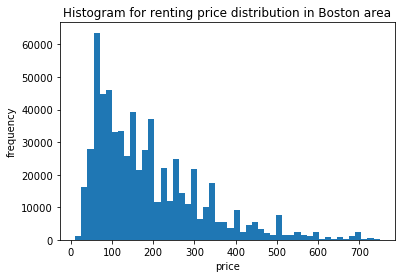

In [44]:
plt.hist(list(boston_prices[boston_prices['price'] < 5 * np.median(boston_prices['price'])]['price']), bins = 50)
#plt.hist(list(boston_prices[boston_prices['price'] < np.mean(boston_prices['price']) + \
#                                                     5 * np.std(boston_prices['price'])]['price']), bins = 50)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram for renting price distribution in Boston area')
plt.show()

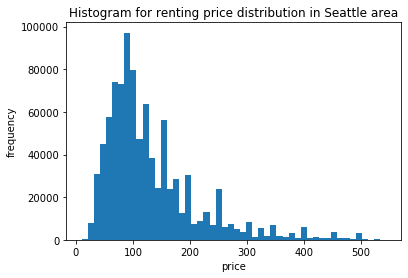

In [45]:
plt.hist(list(seattle_prices[seattle_prices['price'] < 5 * np.median(seattle_prices['price'])]['price']), bins = 50)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Histogram for renting price distribution in Seattle area')
plt.show()